In [17]:
# to convert mp3 to wav format
from pydub import AudioSegment
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [18]:
# convert mp3 to wav format for getting a spectogram

song = AudioSegment.from_mp3("C:/Users/spari/Projects/DM Pro/Sound Similarity/Switchfoot.mp3")
song = song.set_channels(1) # getting mono from stereo 
song.export("Switchfoot.wav", format="wav")

<_io.BufferedRandom name='Switchfoot.wav'>

### Approach 1- Specgram

In [13]:
import scipy.io.wavfile as wav
import scipy.signal as signal
from matplotlib import pyplot as plt

In [22]:
sample_rate, samples = wavfile.read('Switchfoot.wav')
frequencies, times, spectogram = signal.stft(samples, sample_rate)


In [21]:
## error
plt.specgram(samples, Fs=sample_rate)
plt.show()

C:\Users\spari\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
# #### playes the music

# from pygame import mixer # Load the required library

# mixer.init()
# mp = mixer.music.load('Switchfoot.mp3')
# mixer.music.play()

### Approach 2- Spectogram

In [8]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('newSong.wav')
print("Sample Rates", sample_rate,"/nSamples", samples)
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)


Sample Rates 44100 /nSamples [5971 8845 8852 ...,   96  109  -44]


In [9]:
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)

In [10]:
print("freq", frequencies.shape)
print("time", times.shape)
print("spec", spectogram.shape)

freq (129,)
time (1378,)
spec (129, 1378)


TypeError: Object of type 'ndarray' is not JSON serializable

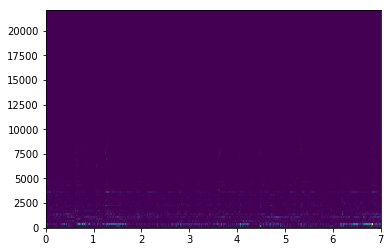

In [11]:
# takes loads of time
plt.pcolormesh(times, frequencies, spectogram)

In [6]:
# # fig = plt.figure(figsize=(50, 50), dpi=100)
# plt.imshow(spectogram)
# plt.pcolormesh(times, frequencies, spectogram)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

KeyboardInterrupt: 

In [ ]:
# segments and saves that song
from pydub import AudioSegment
t1 = 1000 #Works in milliseconds
t2 = 8000
newAudio = AudioSegment.from_wav("Switchfoot.wav")
newAudio = newAudio[t1:t2]
newAudio.export('newSong.wav', format="wav") 

In [ ]:
# reference code for setting music to a particular frame and playing music from that for a particular frame lenth

import pyaudio
import wave

# set desired values
start = 200
length = 10

# open wave file
wave = wave.open('Switchfoot.wav', 'rb')

# initialize audio
py_audio = pyaudio.PyAudio()
stream = py_audio.open(format=py_audio.get_format_from_width(wave.getsampwidth()),
                       channels=wave.getnchannels(),
                       rate=wave.getframerate(),
                       output=True)

# skip unwanted frames
n_frames = int(start * wave.getframerate())
print(n_frames)
wave.setpos(n_frames)

# write desired frames to audio buffer
n_frames = int(length * wave.getframerate())
frames = wave.readframes(n_frames)

stream.write(frames)

# close and terminate everything properly
wave.close()
stream.close()
py_audio.terminate()